# Experiment

# Setup

In [ ]:
FILENAME = '3_classes/BTCUSDT_1h_market_class_index.csv'

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv(FILENAME)
df = df.dropna().astype(int)
df = df[df.iloc[:, -1] != 2]


,market_class_rsi,market_class_macd,market_class_stoch,market_class_stochf,market_class_aroonosc,market_class_willr,market_class_cci,market_class_mfi,market_class_ultosc,market_class_dmi,market_class_supertrend,market_class_good_entry_3
33,1,1,1,1,0,1,1,1,1,1,0,0
34,1,1,1,1,1,1,1,1,1,1,0,0
35,1,1,1,0,1,1,1,1,1,1,0,0
36,0,0,0,0,1,0,0,1,0,0,0,0
37,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8858,1,1,1,0,1,1,1,1,0,1,1,0
8866,1,1,1,1,1,0,1,1,1,1,1,0
8867,1,0,1,0,1,0,0,1,1,1,1,0
8870,1,0,0,0,0,0,0,1,1,1,1,0


In [ ]:

def balance_dataset_by_random_undersampling(df):
    target_column = df.iloc[:, -1]

    # Count the occurrences of each class in the target column
    class_counts = target_column.value_counts()

    # Find the class with the majority of samples (dominant class)
    dominant_class = class_counts.idxmax()

    # Find the number of samples in the dominant class
    dominant_class_count = class_counts.max()

    # Find the number of samples in the minority class (other class)
    minority_class_count = class_counts.min()

    # Calculate the number of samples to be removed from the dominant class
    num_samples_to_remove = dominant_class_count - minority_class_count

    # Identify the indices of rows corresponding to the dominant class
    dominant_class_indices = df[target_column == dominant_class].index

    # Randomly select and remove rows from the dominant class
    indices_to_remove = np.random.choice(dominant_class_indices, size=num_samples_to_remove, replace=False)
    balanced_df = df.drop(indices_to_remove)

    return balanced_df

df = balance_dataset_by_random_undersampling(df)

## Plot correlation matrix

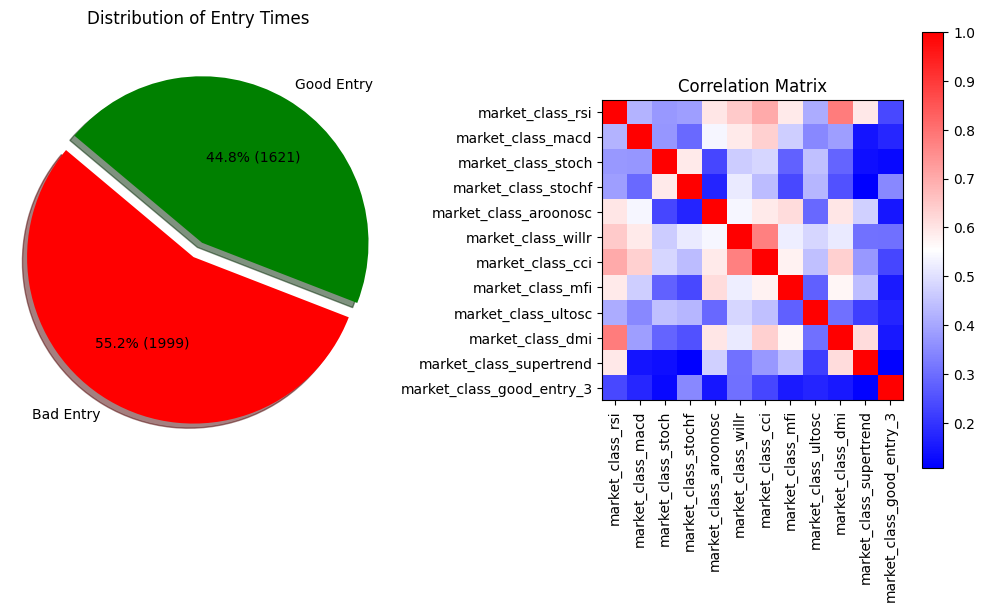

In [ ]:
num_classes = len(df.iloc[:, -1].unique())

if num_classes == 2:
    labels = ['Bad Entry', 'Good Entry']
    colors = ['red', 'green']
    explode = (0, 0.1)  # To highlight the 'Good Entry' slice
elif num_classes == 3:
    labels = ['Bad Entry', 'Good Entry', 'Other']
    colors = ['red', 'green', 'blue']
    explode = (0, 0.1, 0)  # To highlight the 'Good Entry' slice
else:
    raise ValueError("Number of classes should be 2 or 3")

value_counts = df.iloc[:, -1].value_counts()
total_count = len(df.iloc[:, -1])

plt.figure(figsize=(10, 6))  # Adjust the figure size to fit both plots side by side
plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, position 1)
plt.pie(value_counts, explode=explode, labels=labels, colors=colors, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * total_count / 100), shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Entry Times')

# Graph 2: Correlation matrix
correlation_matrix = df.corr()
plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, position 2)
plt.imshow(correlation_matrix, cmap='bwr', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title("Correlation Matrix")

plt.tight_layout()  # To prevent overlapping of subplots
plt.show()

## Plot output distribution

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

def train_LogisticRegression(df):
    # Separate the input features (X) and the output target (y)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the input features (optional but often improves performance)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a logistic regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print("Model Accuracy:", accuracy)
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(confusion)

    model_filename = 'logistic_regression_model.joblib'
    joblib.dump(model, model_filename)
    print(f"Model saved as {model_filename}")

train_LogisticRegression(df)

Model Accuracy: 0.6339779005524862
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       324
           1       0.68      0.65      0.66       400

    accuracy                           0.63       724
   macro avg       0.63      0.63      0.63       724
weighted avg       0.64      0.63      0.63       724

Confusion Matrix:
[[200 124]
 [141 259]]
Model saved as logistic_regression_model.joblib


In [ ]:
model = joblib.load("logistic_regression_model.joblib")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_XGBClassifier(df):
    # Separate the input features (X) and the output target (y)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Drop rows with target value 2 in the output column
    #df = df[df.iloc[:, -1] != 2]
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the input features (optional but often improves performance)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train an XGBoost model
    model = xgb.XGBClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print("Model Accuracy:", accuracy)
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(confusion)

train_XGBClassifier(df)


Model Accuracy: 0.6284530386740331
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       324
           1       0.68      0.62      0.65       400

    accuracy                           0.63       724
   macro avg       0.63      0.63      0.63       724
weighted avg       0.63      0.63      0.63       724

Confusion Matrix:
[[208 116]
 [153 247]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_Keras(df):
    # Separate the input features (X) and the output target (y)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Drop rows with target value 2 in the output column
    #df = df[df.iloc[:, -1] != 2]
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the input features (optional but often improves performance)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build a simple neural network with Keras
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred_binary)
    report = classification_report(y_test, y_pred_binary)
    confusion = confusion_matrix(y_test, y_pred_binary)

    print("Model Accuracy:", accuracy)
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(confusion)

train_Keras(df)


Epoch 1/50
362/362 [==============================] - 2s 3ms/step - loss: 0.6126 - accuracy: 0.6796
Epoch 2/50
362/362 [==============================] - 1s 3ms/step - loss: 0.5933 - accuracy: 0.7041
Epoch 3/50
362/362 [==============================] - 1s 2ms/step - loss: 0.5858 - accuracy: 0.7020
Epoch 4/50
362/362 [==============================] - 1s 2ms/step - loss: 0.5837 - accuracy: 0.7082
Epoch 5/50
362/362 [==============================] - 1s 2ms/step - loss: 0.5788 - accuracy: 0.7131
Epoch 6/50
362/362 [==============================] - 1s 2ms/step - loss: 0.5804 - accuracy: 0.7127
Epoch 7/50
362/362 [==============================] - 1s 2ms/step - loss: 0.5761 - accuracy: 0.7141
Epoch 8/50
362/362 [==============================] - 1s 2ms/step - loss: 0.5754 - accuracy: 0.7172
Epoch 9/50
362/362 [==============================] - 1s 2ms/step - loss: 0.5730 - accuracy: 0.7182
Epoch 10/50
362/362 [==============================] - 1s 2ms/step - loss: 0.5703 - accuracy: 0.7193